In [1]:
import json
import os
import pinecone
from pinecone import ServerlessSpec
from utils import ImageFeatureExtractor
from utils import OpenAIEmbedder

from pipeline import PineconeClient,load_json

/Users/ahmadshahzad/anaconda3/envs/torch/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ahmadshahzad/anaconda3/envs/torch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:

pinecone_api_key = os.environ.get('PINECONE_API_KEY') or ""
open_api_key = os.environ.get('OPENAI_API_KEY') or ""


In [3]:
intId_image_data = load_json('updated_struct_jsons/intid_to_imagepth_pid.json')

pid_to_text_data=load_json('updated_struct_jsons/titles-descrp-paths.json')

In [4]:
# # Pinecone setup
# pinecone_client = PineconeClient(api_key=pinecone_api_key)
# product_listing_index = pinecone_client.get_index('full-pd-embeddings')
# title_emb_index = pinecone_client.get_index('full-text-embeddings')

In [5]:
# # Initialize feature extractor and embedder
# image_feature_extractor = ImageFeatureExtractor()
# openai_embedder = OpenAIEmbedder()

In [6]:
from pipeline import get_similar_product



In [31]:
query_img_path = pid_to_text_data['11000']['image_paths']

query_title = pid_to_text_data['11000']['item_name']
query_feats=  pid_to_text_data['11000']['features']

In [32]:
query_img_path

['f4/f4426abb.jpg',
 'f4/f4426abb.jpg',
 'f4/f4426abb.jpg',
 'f4/f4426abb.jpg',
 'f4/f4426abb.jpg']

product-listing-dataset/images/small f4/f4426abb.jpg
product-listing-dataset/images/small f4/f4426abb.jpg
product-listing-dataset/images/small f4/f4426abb.jpg
product-listing-dataset/images/small f4/f4426abb.jpg
product-listing-dataset/images/small f4/f4426abb.jpg



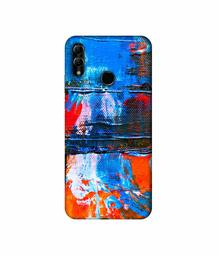
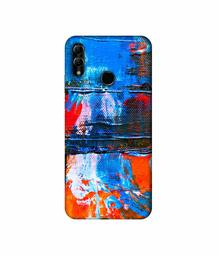
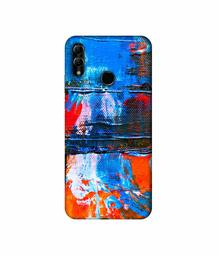
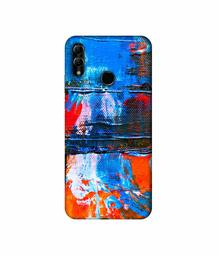
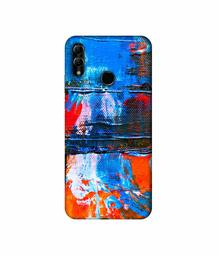

In [33]:
from IPython.display import display, HTML
import base64
import os

# Function to display images with title and description
def display_images_with_description(base_path, image_paths, title, description):
    # Create HTML structure
    html_content = f"""
    <div style="text-align: center;">
        <h2>{title}</h2>
        <p>{description}</p>
    """
    
    # Iterate through image paths
    for image_path in image_paths:
        print(base_path, image_path)
        full_image_path = os.path.join(base_path, image_path)
        
        # Read the image and encode it in base64
        with open(full_image_path, "rb") as file:
            img_data = file.read()
            img_base64 = base64.b64encode(img_data).decode('utf-8')

        # Add image to HTML content
        html_content += f"""
        <img src="data:image/png;base64,{img_base64}" alt="{title}" style="max-width: 100%; height: auto; margin-bottom: 20px;">
        """
    
    # Close the div
    html_content += "</div>"

    # Display the HTML
    display(HTML(html_content))

# Example usage
base_pth = 'product-listing-dataset/images/small' 


display_images_with_description(base_pth,query_img_path, query_title, query_feats)



In [34]:
out_paths, out_titles= get_similar_product(query_img_path[0],query_title)

matching image ids dict_keys(['51265', '51266', '51268', '51264', '51267', '13673', '13671', '13675', '13672', '13674', '25786', '25788', '25785', '25789', '25787', '31813', '31815', '31816', '31814', '31817', '86832', '86833', '86834', '86835', '86831', '40391', '40389', '40388', '40387', '40390', '59663', '59662', '59661', '59659', '59660', '29261', '29258', '29260', '29259', '29262', '49635', '49631', '49634', '49633', '49632', '67389', '67392', '67388', '67391', '67390'])
matching text Pids dict_keys(['11000', '18979', '18207', '18799', '15641', '14397', '1113', '4861', '8362', '7860', '1327', '11035', '16723', '19597', '5972', '5811', '13889', '6671', '14792', '19799', '11841', '18954', '4648', '15991', '11917', '875', '18570', '9911', '15310', '15065', '16722', '16758', '16894', '14454', '11896', '2466', '9069', '17045', '12769', '593', '11078', '6273', '67', '16094', '19344', '14437', '15725', '18490', '6813', '15098'])
matched pid to int-ids dict_keys(['11000', '2958', '5538', 

In [35]:
out_paths

[['f4/f4426abb.jpg',
  'f4/f4426abb.jpg',
  'f4/f4426abb.jpg',
  'f4/f4426abb.jpg',
  'f4/f4426abb.jpg'],
 ['75/75453b56.jpg',
  '75/75453b56.jpg',
  '75/75453b56.jpg',
  '75/75453b56.jpg',
  '75/75453b56.jpg'],
 ['d3/d308ad68.jpg',
  'd3/d308ad68.jpg',
  'd3/d308ad68.jpg',
  'd3/d308ad68.jpg',
  'd3/d308ad68.jpg'],
 ['9b/9bd0f640.jpg',
  '9b/9bd0f640.jpg',
  '9b/9bd0f640.jpg',
  '9b/9bd0f640.jpg',
  '9b/9bd0f640.jpg']]

product-listing-dataset/images/small/ f4/f4426abb.jpg
product-listing-dataset/images/small/ f4/f4426abb.jpg
product-listing-dataset/images/small/ f4/f4426abb.jpg
product-listing-dataset/images/small/ f4/f4426abb.jpg
product-listing-dataset/images/small/ f4/f4426abb.jpg



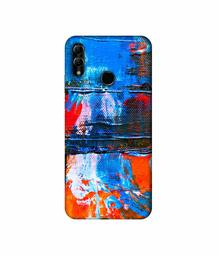
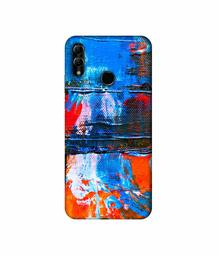
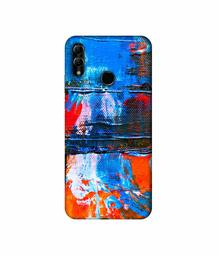
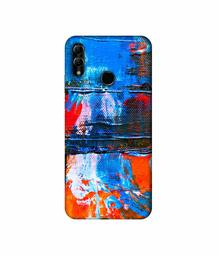
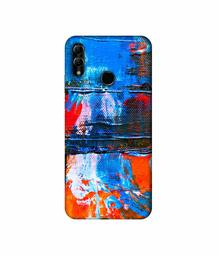

product-listing-dataset/images/small/ 75/75453b56.jpg
product-listing-dataset/images/small/ 75/75453b56.jpg
product-listing-dataset/images/small/ 75/75453b56.jpg
product-listing-dataset/images/small/ 75/75453b56.jpg
product-listing-dataset/images/small/ 75/75453b56.jpg



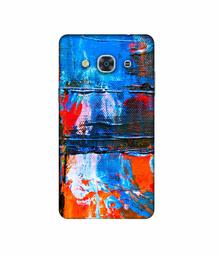
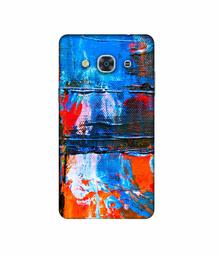
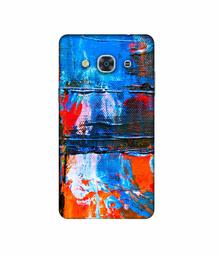
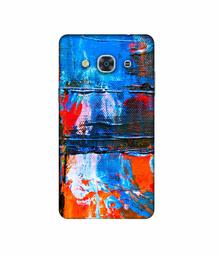
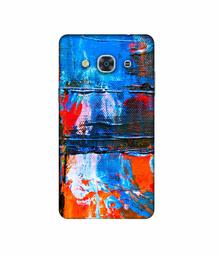

product-listing-dataset/images/small/ d3/d308ad68.jpg
product-listing-dataset/images/small/ d3/d308ad68.jpg
product-listing-dataset/images/small/ d3/d308ad68.jpg
product-listing-dataset/images/small/ d3/d308ad68.jpg
product-listing-dataset/images/small/ d3/d308ad68.jpg



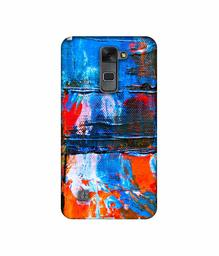
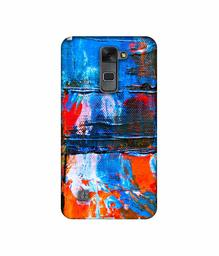
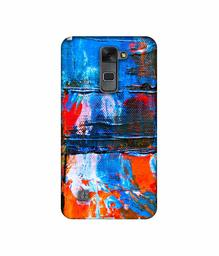
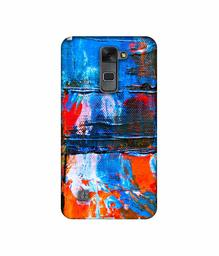
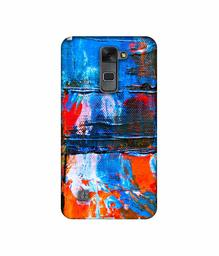

product-listing-dataset/images/small/ 9b/9bd0f640.jpg
product-listing-dataset/images/small/ 9b/9bd0f640.jpg
product-listing-dataset/images/small/ 9b/9bd0f640.jpg
product-listing-dataset/images/small/ 9b/9bd0f640.jpg
product-listing-dataset/images/small/ 9b/9bd0f640.jpg



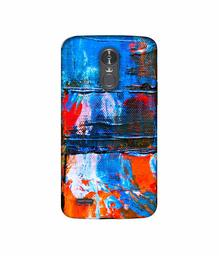
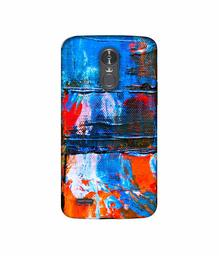
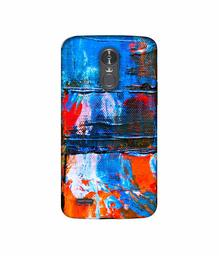
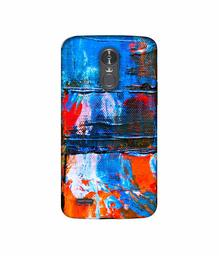
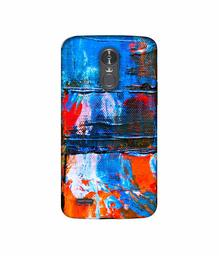

In [36]:
for paths, titles in zip(out_paths, out_titles):
    # print(paths)
    base_path= 'product-listing-dataset/images/small/' 
    display_images_with_description(base_path,paths, titles[0], titles[1])

    